In [9]:
import numpy as np
import matplotlib.pyplot as plt
import edoxrd as xrd
%matplotlib inline

In [183]:
d = './example_data/'
_103 = !ls {d} | grep '103' | grep asc
for index,fname in enumerate(_103):
    print fname
    _103[index] = d+fname

e16014_01_-103_KTO_RSM_2-Theta.asc
e16014_02_-103_PTO_RSM_2-Theta.asc


In [184]:
dset = _103[0]
qx, qz, i = xrd.read_rsm_data(dset,coordinates='qspace')

Define the `qz` value at which you want to make a cut through the data:

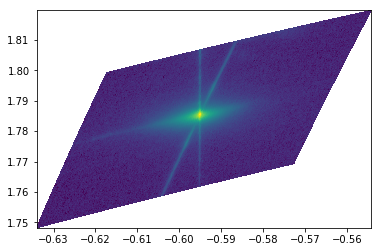

In [185]:
plt.pcolormesh(qx,qz,i);

In [186]:
z = 1.79

Find the values closest to this specified value:

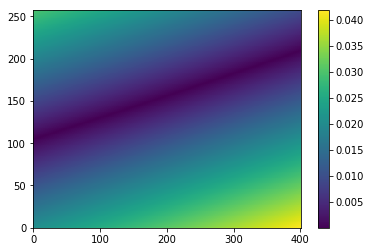

In [187]:
diff = abs(qz-z)
plt.pcolormesh(diff)
plt.colorbar();

Make a mask out of the values within $10^{-3}$ of the specified value

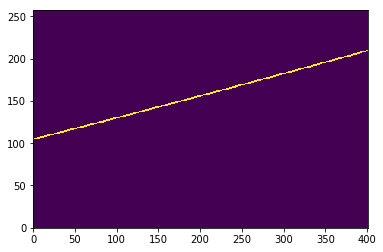

In [188]:
mask_qz = ((diff>0) & (diff<2e-4))
plt.pcolormesh(mask_qz);

Find the indexes of `qx` corresponding to this mask:

In [189]:
lst_z = []
for number in diff[mask_qz]: #note that diff[mask_qz] is a 1D array of values
    x_index = np.where(diff==number)[0][0]
    y_index = np.where(diff==number)[1][0]
    lst_z.append([x_index,y_index])

idx_qz = np.array(lst_z) # a 2D array. col0:x, col1:y

Find the `qx` and `i` values that correspond to the chosen `qz` indexes.

In [179]:
idx_qz

array([[104,   0],
       [105,   0],
       [105,   1],
       ..., 
       [209, 400],
       [210, 399],
       [210, 400]])

In [190]:
x, y = idx_qz[:,0], idx_qz[:,1]

qz_cut = qx[x,y]
i_cut = i[x,y]

Finish!

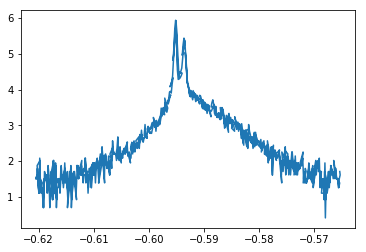

In [23]:
plt.plot(qz_cut,i_cut)

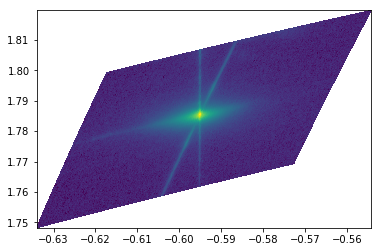

In [192]:
plt.pcolormesh(qx,qz,i);

Combine with choosing any line cut on the plot. Choose start,finish `qx,qz` coordinates:

In [270]:
start_qx, start_qz = -0.62, 1.76
end_qx, end_qz = -0.58, 1.80

In [194]:
x = np.linspace(start_qx,end_qx,100)
z = np.linspace(start_qz,end_qz,100)

See where this line is:

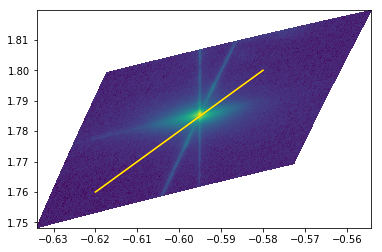

In [195]:
plt.pcolormesh(qx,qz,i)
plt.plot([start_qx, end_qx], [start_qz, end_qz], c='red');
plt.plot(x,z,c='yellow');

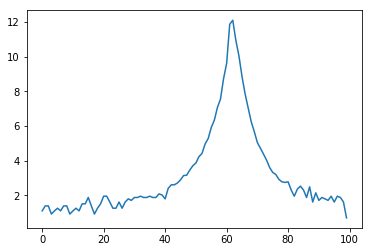

In [268]:
ind = abs((qz.ravel() - z[:,None])**2 + (qx.ravel() - x[:,None])**2 ).argmin(1)
qz_closest = qz.ravel()[ind]
qx_closest = qx.ravel()[ind]
# plt.plot(qx_closest, qz_closest)
plt.plot(i.ravel()[ind])

In [143]:
np.argmin?

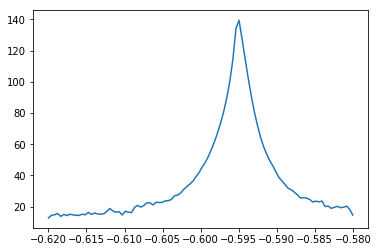

In [269]:
# ind = ((qz.ravel() - z[:,None])**2 + (qx.ravel() - x[:,None])**2 ) < (3e-3)**2
ind = np.exp(-((qz.ravel() - z[:,None])**2 + (qx.ravel() - x[:,None])**2 ) /0.0000001)
ind.shape

Icut = ((i.ravel() * np.ones(ind.shape[0])[:,None]) * ind).sum(1)
plt.plot(x, Icut)

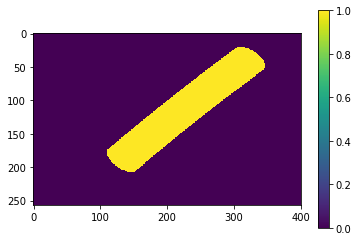

In [260]:
ind.shape
plt.imshow(ind.max(0).reshape(qx.shape))
plt.colorbar()

Find closest values to specified coordinates:

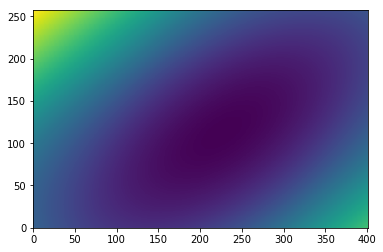

In [218]:
plt.pcolormesh(xa**2+za)

In [249]:
# does this make sense?
#xa, za = np.zeros_like(qx), np.zeros_like(qz)
mask = np.zeros_like(qx)
#for x_coord in x:
#    xa = abs(qx-x_coord) + xa
#for z_coord in z:
#    za = abs(qz-z_coord) + za
for x_coord,z_coord in zip(x,z):
    dist = abs(qx-x_coord)**2 + abs(qz-z_coord)**2 
    mask += dist < 0.0005
# x_mask = (xa>0) & (xa<1.011)
# z_mask = (za>0) & (za<1.011)
#mask = dist < 0.05

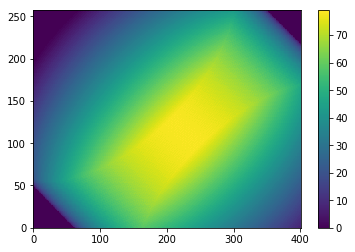

In [250]:
plt.pcolormesh(mask)
plt.colorbar()

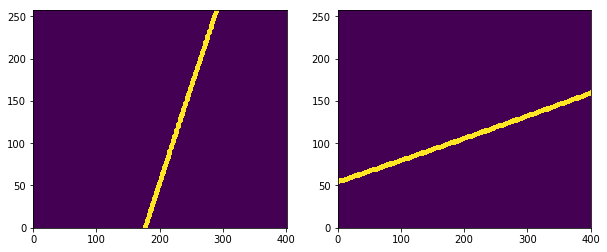

In [251]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.pcolormesh(x_mask)
ax2.pcolormesh(z_mask);

(2074,)

In [199]:
tx,tz = np.meshgrid(x_mask[0],z_mask[:,0])

In [200]:
ttx, ttz = np.meshgrid(tx[0],tz[:,0])

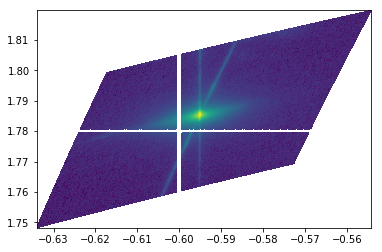

In [201]:
plt.pcolormesh(qx,qz,np.ma.masked_array(i,mask = x_mask + z_mask))

In [14]:
sx = abs(qx-start_qx)
ex = abs(qx-end_qx)

sz = abs(qz-start_qz)
ez = abs(qz-end_qz)

In [80]:
sx_mask = (sx>0) & (sx<3e-3)
ex_mask = (ex>0) & (ex<3e-3)

sz_mask = (sz>0) & (sz<3e-3)
ez_mask = (ez>0) & (ez<3e-3)

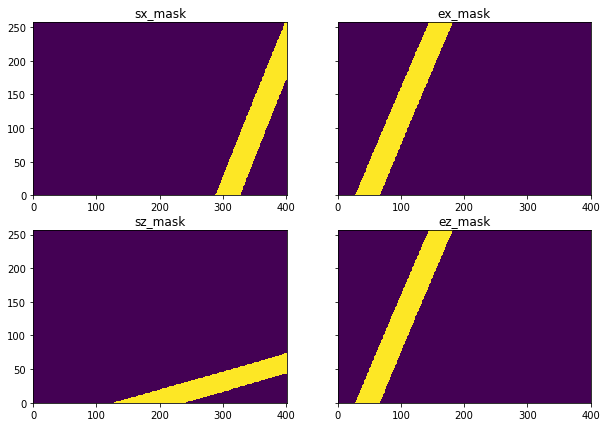

In [81]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharey=True,figsize=(10,7))
ax1.pcolormesh(sx_mask);ax1.set_title('sx_mask')
ax2.pcolormesh(ex_mask);ax2.set_title('ex_mask')
ax3.pcolormesh(sz_mask);ax3.set_title('sz_mask')
ax4.pcolormesh(ex_mask);ax4.set_title('ez_mask');

Find 

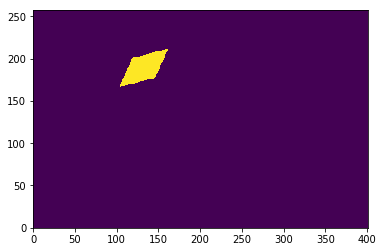

In [82]:
e_mask = (ex_mask == True) & (ez_mask == True)
plt.pcolormesh(e_mask)

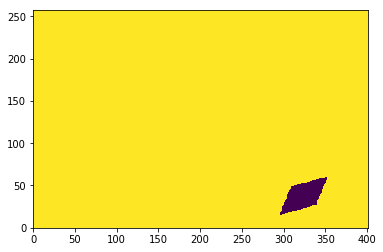

In [83]:
s_mask = (sx_mask == True) & (sz_mask == True)
plt.pcolormesh(1-s_mask)

In [79]:
i[s_mask].shape

(14,)

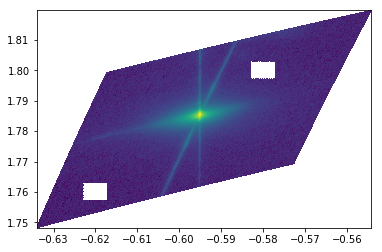

In [85]:
plt.pcolormesh(qx,qz,np.ma.masked_array(i,mask = s_mask+e_mask))

In [138]:
# lst_z = []
# for number in diff[mask_qz]: #note that diff[mask_qz] is a 1D array of values
#     lst_z.append([(int(np.where(diff==number)[0])),int(np.where(diff==number)[1])])
# idx_qz = np.array(lst_z) # a 2D array. col0:x, col1:y

lst_sx , lst_sz, lst_ex, lst_ez = [],[],[],[]

for number in sx[sx_mask]:
    sx_xindex = np.where(sx==number)[0][0]
    sx_yindex = np.where(sx==number)[1][0]
    lst_sx.append([sx_xindex,sx_yindex])
    
for number in sz[sz_mask]:
    sz_xindex = np.where(sz==number)[0][0]
    sz_yindex = np.where(sz==number)[1][0]
    lst_sz.append([sz_xindex,sz_yindex])
    
for number in ex[ex_mask]:
    ex_xindex = np.where(ex==number)[0][0]
    ex_yindex = np.where(ex==number)[1][0]
    lst_ex.append([ex_xindex,ex_yindex])
    
for number in ez[ez_mask]:
    ez_xindex = np.where(ez==number)[0][0]
    ez_yindex = np.where(ez==number)[1][0]
    lst_ez.append([ez_xindex,ez_yindex])

Problem: the arrays that follow are all of different shape.

In [140]:
sxx = np.array(lst_sx)
szz = np.array(lst_sz)
exx = np.array(lst_ex)
ezz = np.array(lst_ez)

In [169]:
for row in sxx: 
    for row2 in szz:
        test=(row==row2).all()
        
test

False